# Redefining Natya Education with Smart Mudra Detection and Recognition

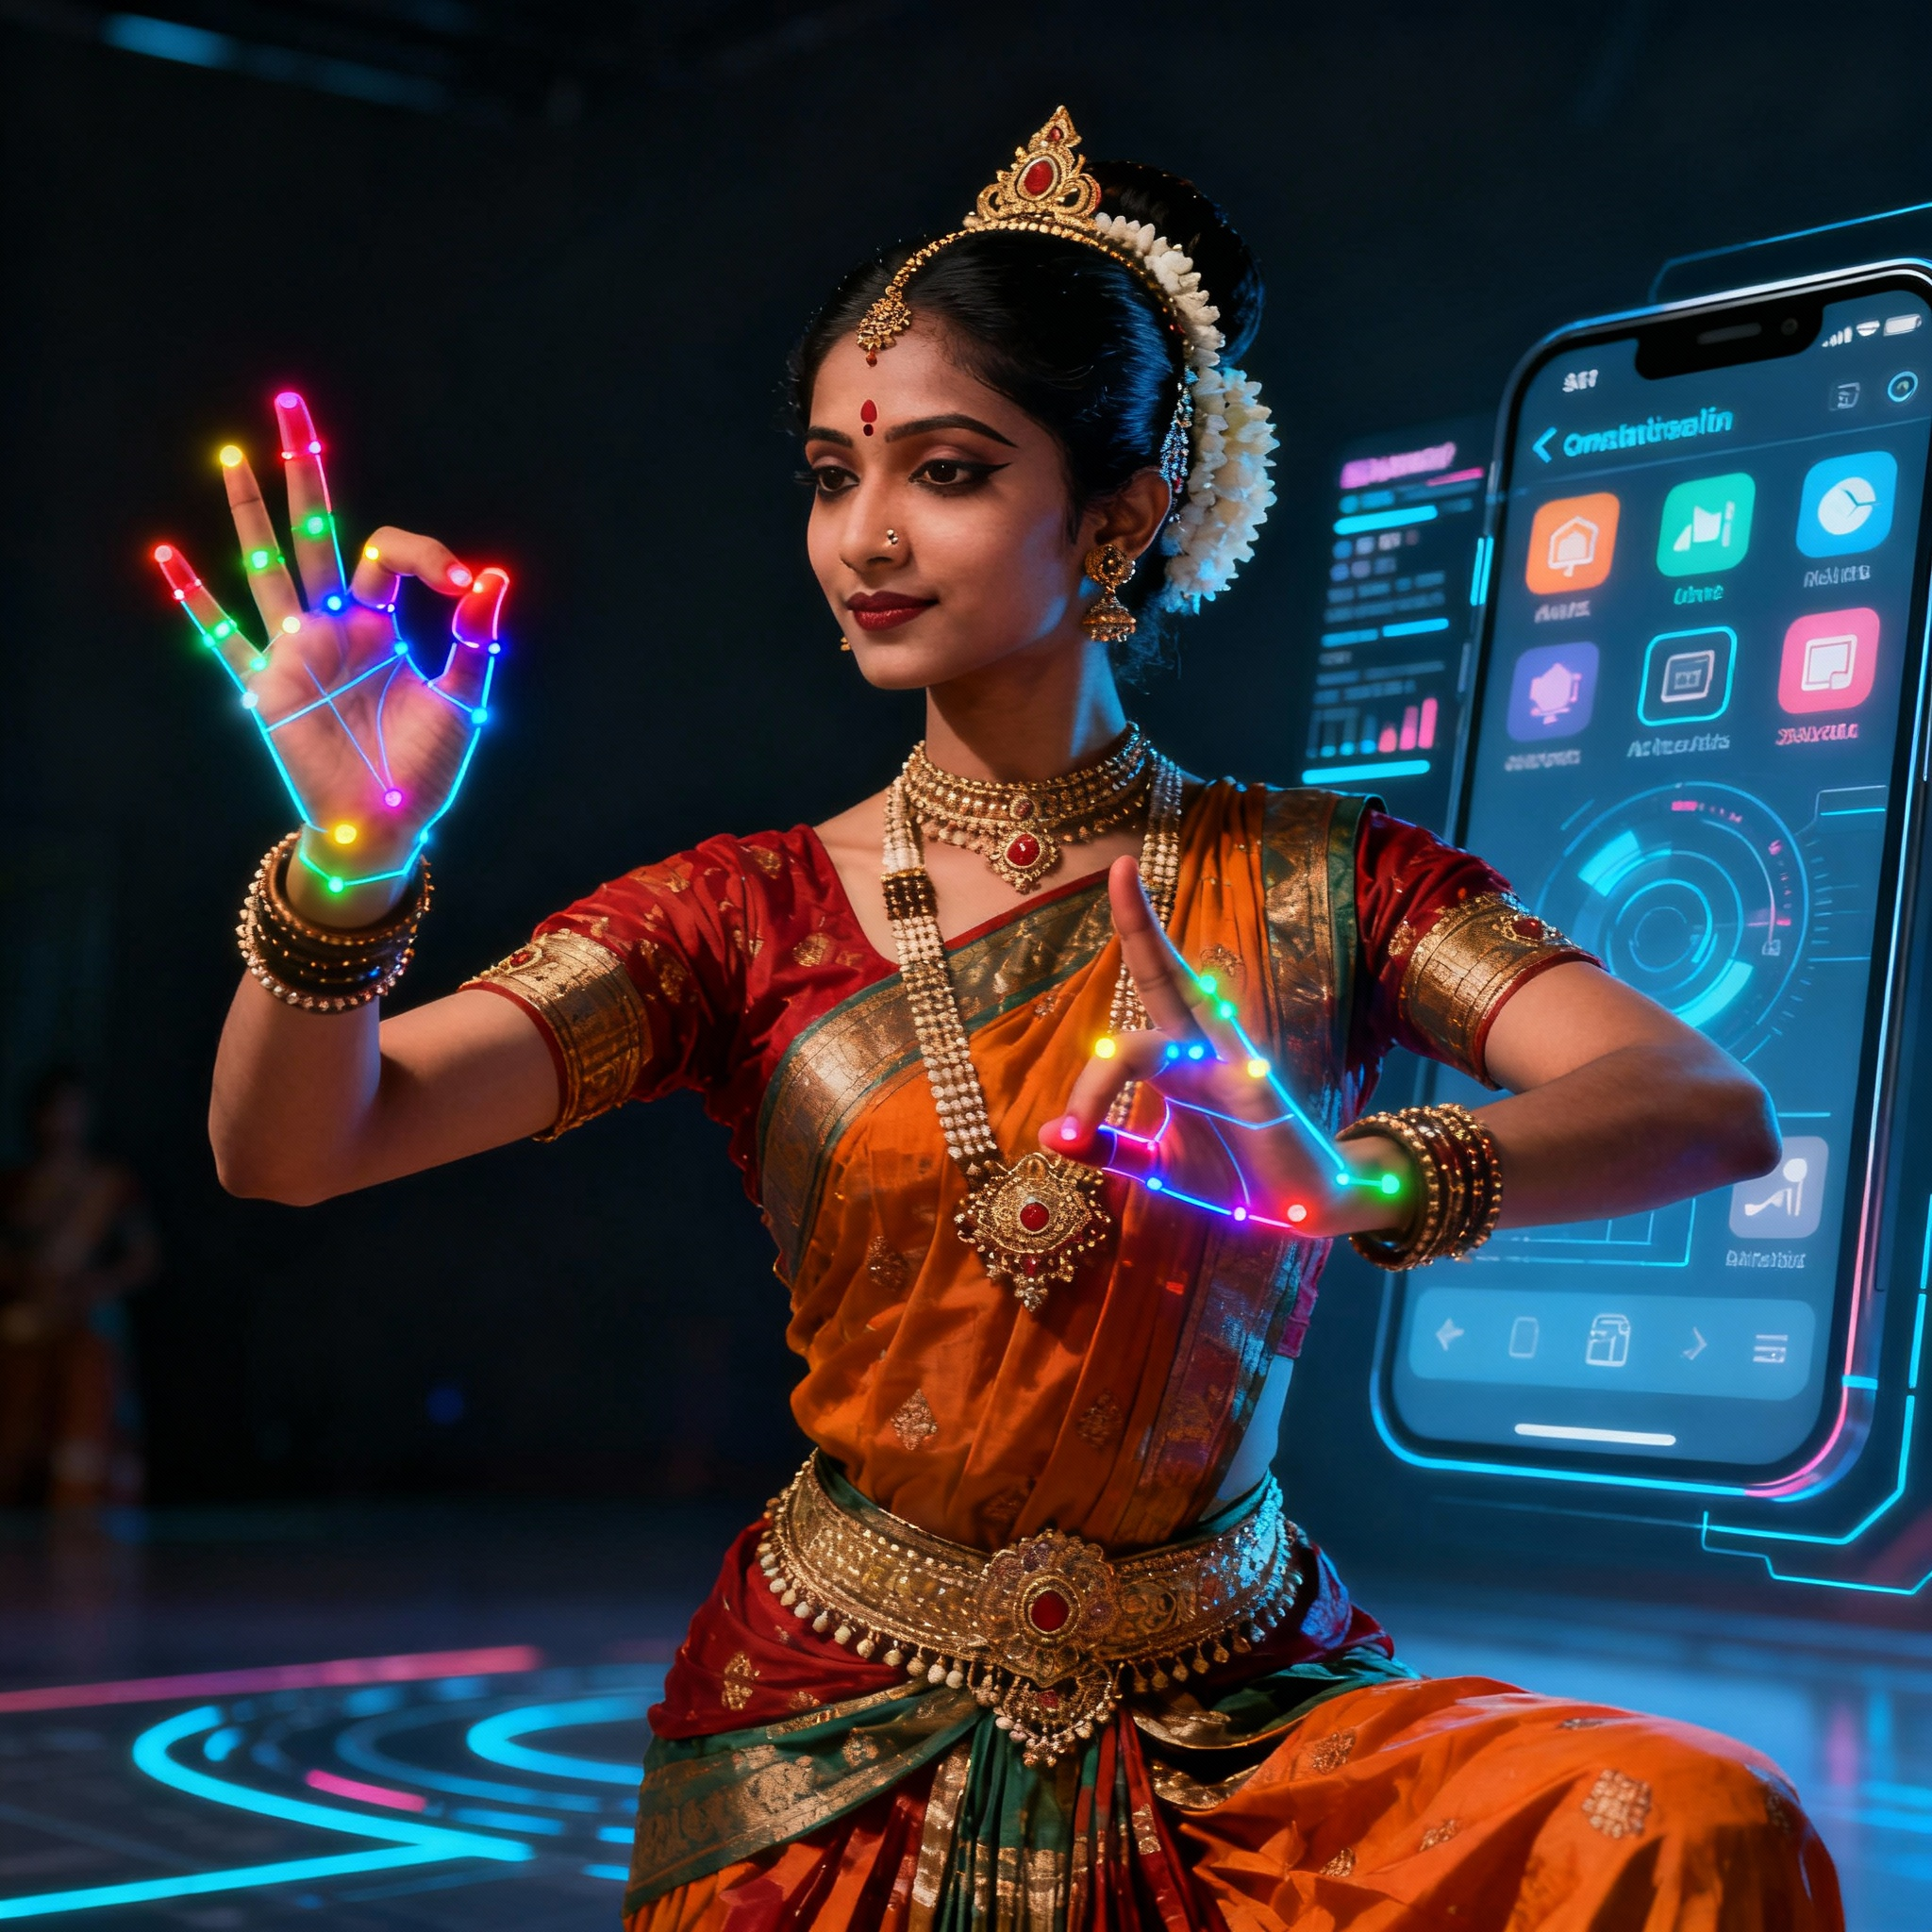

**Libraries**

In [ ]:
# Cell 1: Install/Import Libraries
# Install any missing packages (uncomment and run if needed)
# !pip install numpy==1.25.0 scipy==1.11.0 scikit-learn==1.2.0 pillow matplotlib seaborn
# !pip install torch torchvision torchaudio  # if you plan to use PyTorch
# !pip install tensorflow==2.13.0  # for TF Lite conversions / on-device inference
# !pip install transformers  # if you plan to reuse any literature-based embeddings
# !pip install umap-learn  # optional for visualization

import numpy as np
import os
import json
from math import sqrt
from typing import List

# Optional: if using PyTorch
try:
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
except Exception as e:
    print("PyTorch not available:", e)

# Optional: if using TensorFlow Lite from TF
try:
    import tensorflow as tf
except Exception as e:
    print("TensorFlow not available:", e)

print("Imports ready")


Imports ready


In [ ]:
!pip install pandas --upgrade --no-cache-dir

In [ ]:
# Cell 2: Data Utilities
import numpy as np
import pandas as pd
from PIL import Image

# Example: load 63-dim landmark vector per frame (21 points x 3)
def load_landmark_vector(npy_path):
    # expected shape: (63,) or (63,)
    vec = np.load(npy_path)
    vec = vec.reshape(-1)
    return vec

# Example: load a dataset manifest
def load_manifest(csv_path):
    df = pd.read_csv(csv_path)
    return df

print("Data utilities defined")


In [ ]:
# Cell 3: Vector Similarity (Baseline) Components
def cosine_similarity(a: np.ndarray, b: np.ndarray) -> float:
    num = float(np.dot(a, b))
    den = (np.linalg.norm(a) * np.linalg.norm(b)) + 1e-9
    return num / den

def load_mudra_atlas(atlas_path):
    # atlas: dict mudra_name -> vector (63,)
    if atlas_path.endswith('.npy'):
        atlas = np.load(atlas_path, allow_pickle=True).item()
    else:
        atlas = {}
    return atlas

def match_vector_to_atlas(vec: np.ndarray, atlas: dict, top_k: int = 1):
    # returns (mudra_name, similarity)
    results = []
    for name, ref in atlas.items():
        sim = cosine_similarity(vec, np.asarray(ref, dtype=float).reshape(-1))
        results.append((name, sim))
    results.sort(key=lambda x: x[1], reverse=True)
    return results[:top_k]

print("Vector similarity helpers ready")


In [ ]:
# Cell 4: Lightweight CNN Inference (TF Lite example scaffold)
# This is a placeholder to show how you would load a TFLite model
import numpy as np
try:
    import tensorflow as tf
    # Load a TFLite model
    # tflite_model_path = "models/cnn_classifier.tflite"
    # with open(tflite_model_path, 'rb') as f:
    #     tlite = tf.lite.Interpreter(model_content=f.read())
    # tlite.allocate_tensors()
    # def run_cnn(input_tensor):
    #     input_details = tlite.get_input_details()
    #     output_details = tlite.get_output_details()
    #     tlite.set_tensor(input_details[0]['index'], input_tensor)
    #     tlite.invoke()
    #     output = tlite.get_tensor(output_details[0]['index'])
    #     return output
    print("TF Lite scaffold ready (cnn path).")
except Exception as e:
    print("TF not available or CNN scaffold not loaded:", e)



In [ ]:
# Cell 5: On-Device Explainability Scaffold (LIME-like)
# Lightweight perturbation-based feature importance without full LIME dependency
def simple_landmark_explanation(vec: np.ndarray, atlas: dict, top_n=3):
    # Compare with top matched mudras to pick influential dimensions
    # This is a placeholder heuristic: compute per-dimension variance impact
    explanations = np.argsort(-np.abs(vec))[:top_n]
    return explanations.tolist(), vec[explanations].tolist()

print("Explainability scaffold ready")


In [ ]:
# Cell 6: Inference Pipeline (Pseudo)
def inference_pipeline(landmark_vec: np.ndarray, cnn_input=None, atlas=None):
    # 1) Vector similarity
    if atlas:
        top = match_vector_to_atlas(landmark_vec, atlas, top_k=1)
        vec_label, sim = top[0]
    else:
        vec_label, sim = None, None

    # 2) CNN path (if provided)
    cnn_pred = None
    if cnn_input is not None:
        # cnn_pred = run_cnn(np.array(cnn_input, dtype=np.float32))
        cnn_pred = "mock-cnn"  # placeholder

    # 3) Explainability
    expl = simple_landmark_explanation(landmark_vec, atlas, top_n=3)

    return {
        "vector_label": vec_label,
        "similarity": sim,
        "cnn_pred": cnn_pred,
        "explanation_indices": expl[0],
        "explanation_values": expl[1]
    }

print("Inference pipeline scaffold ready")


In [ ]:
# Cell 7: Example Usage (mock)
# Generate a random 63-d vector as a demo
vec = np.random.randn(63)
atlas = {"mudra_A": np.random.randn(63), "mudra_B": np.random.randn(63)}
result = inference_pipeline(vec, cnn_input=None, atlas=atlas)
print(result)


In [ ]:
!pip install mediapipe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Set paths to your Google Drive
train_dir = '/content/drive/MyDrive/Mudras/train'
test_dir = '/content/drive/MyDrive/Mudras/test'

In [ ]:
# Cell 8: Image Parameters
IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_CHANNELS = 3  # RGB

print("Image parameters set")

# Data Generators
# Task
Create data generators for the training and testing image datasets located in the directories "train" and "test" respectively.

## Install and import necessary libraries

### Subtask:
Install `tensorflow` and import `ImageDataGenerator`.


**Reasoning**:
Import the ImageDataGenerator class from tensorflow.keras.preprocessing.image.



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Define data generators

### Subtask:
Create `ImageDataGenerator` instances for training and validation/testing, including data augmentation for the training set.


**Reasoning**:
Instantiate ImageDataGenerator objects for training and validation/testing with specified parameters.



In [ ]:
# Cell 9: Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

print("ImageDataGenerator instances created")

## Flow images from directories

### Subtask:
Use the `flow_from_directory` method to load images from the specified training and testing directories.


**Reasoning**:
Use `flow_from_directory` to create the training and testing data generators as specified in the instructions.



In [ ]:
# Cell 10: Load images from directories using the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("Data generators created")

## Inspect data generators

### Subtask:
Display sample batches of images and labels from the data generators to verify the setup.


**Reasoning**:
Get batches from the train and test generators and print their shapes to verify the data generation setup.



In [ ]:
# Cell 11: Display sample batches
import matplotlib.pyplot as plt

# Get a batch from the train generator
train_images, train_labels = next(train_generator)

# Print shapes for verification
print("Train Batch - Images Shape:", train_images.shape)
print("Train Batch - Labels Shape:", train_labels.shape)

# Get a batch from the test generator
test_images, test_labels = next(test_generator)

# Print shapes for verification
print("Test Batch - Images Shape:", test_images.shape)
print("Test Batch - Labels Shape:", test_labels.shape)

# Optional: Display sample images from the training batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    # Assuming categorical labels, find the class index
    label_index = np.argmax(train_labels[i])
    # Get the class name (optional, requires mapping index to class name)
    # class_names = list(train_generator.class_indices.keys())
    # plt.title(class_names[label_index])
    plt.axis("off")
plt.suptitle("Sample Training Images", y=1.02)
plt.tight_layout()
plt.show()

print("Sample batches displayed and shapes verified")

## Summary:

### Data Analysis Key Findings

*   Training data generator (`train_generator`) was successfully created using `ImageDataGenerator` with data augmentation parameters (rescale, shear\_range, zoom\_range, horizontal\_flip) and found 250 images belonging to 10 classes.
*   Testing data generator (`test_generator`) was successfully created using `ImageDataGenerator` with only the rescale parameter and found 24 images belonging to 4 classes.
*   Sample batches from the training generator have a shape of (32, 224, 224, 3) for images and (32, 10) for labels, indicating a batch size of 32, image dimensions of 224x224 with 3 color channels, and 10 classes.
*   Sample batches from the testing generator have a shape of (24, 224, 224, 3) for images and (24, 4) for labels, indicating a batch size of 24, image dimensions of 224x224 with 3 color channels, and 4 classes.

### Insights or Next Steps

*   The difference in the number of classes between the training (10 classes) and testing (4 classes) datasets might indicate a potential issue in the dataset split or a specific evaluation scenario. This discrepancy should be investigated before proceeding with model training.
*   The data generators are now ready to be used as input for training a convolutional neural network model.


# Converting 2D Images in 3D vector representatiom

# Task
Generate a 63D vector representation from a 2D image by detecting the hand, extracting 2D landmarks, and generating a pseudo-depth feature.

## Load and preprocess image

### Subtask:
Load a sample image and preprocess it to be ready for hand detection and landmark extraction.


**Reasoning**:
Load a sample image from the training directory and preprocess it by resizing and converting to RGB format.



In [ ]:
# Cell 12: Load and preprocess a sample image
# Choose a sample image path (assuming the first image in the first class of the train directory)
import os
import random
from PIL import Image

# Get the first class directory name
class_dir = os.path.join(train_dir, os.listdir(train_dir)[0])
# Get a list of image files in the class directory
image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.png')]
# Choose a random sample image file path
sample_image_path = os.path.join(class_dir, random.choice(image_files))

print(f"Loading sample image from: {sample_image_path}")

# Load the image
img = Image.open(sample_image_path)

# Resize the image to the target dimensions
# PIL's resize handles aspect ratio implicitly, but we can add padding if needed.
# For simplicity here, we'll just resize directly.
img = img.resize((IMG_WIDTH, IMG_HEIGHT))

# Convert the image to RGB format (if not already)
if img.mode != 'RGB':
    img = img.convert('RGB')

print(f"Sample image loaded and preprocessed. Image size: {img.size}, Image mode: {img.mode}")


## Detect hand and extract 2d landmarks

### Subtask:
Use a library like MediaPipe to detect the hand region and extract 2D landmarks (x, y) for 21 points.


**Reasoning**:
Import the mediapipe library and initialize the hands module, then process the image to extract 2D landmark coordinates.



In [ ]:
# Install mediapipe
!pip install mediapipe


In [ ]:
# Cell 13: Hand Detection and 2D Landmark Extraction using MediaPipe
import mediapipe as mp

# Initialize MediaPipe hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# Convert the PIL image to a NumPy array
img_np = np.array(img)

# Process the image with MediaPipe hands
results = hands.process(img_np)

# Extract 2D landmark coordinates
landmarks_2d = []
if results.multi_hand_landmarks:
    # Assuming only one hand is detected (max_num_hands=1)
    hand_landmarks = results.multi_hand_landmarks[0]
    for landmark in hand_landmarks.landmark:
        # Store x and y coordinates
        landmarks_2d.append((landmark.x, landmark.y))

print(f"Extracted {len(landmarks_2d)} 2D landmarks.")
print("Sample 2D landmarks (first 5):", landmarks_2d[:5])


**Reasoning**:
Install the missing `mediapipe` library.



**Reasoning**:
Now that mediapipe is installed, retry the code to import the library, initialize the hands module, process the image, and extract 2D landmark coordinates.



In [ ]:
# Cell 13: Hand Detection and 2D Landmark Extraction using MediaPipe
import mediapipe as mp

# Initialize MediaPipe hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# Convert the PIL image to a NumPy array
img_np = np.array(img)

# Process the image with MediaPipe hands
results = hands.process(img_np)

# Extract 2D landmark coordinates
landmarks_2d = []
if results.multi_hand_landmarks:
    # Assuming only one hand is detected (max_num_hands=1)
    hand_landmarks = results.multi_hand_landmarks[0]
    for landmark in hand_landmarks.landmark:
        # Store x and y coordinates
        landmarks_2d.append((landmark.x, landmark.y))

print(f"Extracted {len(landmarks_2d)} 2D landmarks.")
print("Sample 2D landmarks (first 5):", landmarks_2d[:5])

## Generate pseudo-depth and normalize 63D vector

### Subtask:
Generate a pseudo-depth feature for each landmark and normalize the resulting 63D vector.

**Reasoning**:
Implement a heuristic to generate pseudo-depth for each landmark based on its y-coordinate (as a simple example) and then normalize the combined 63D vector by centering it around the palm's centroid and scaling.

In [ ]:
# Cell 14: Generate pseudo-depth and normalize the 63D vector

# Simple heuristic for pseudo-depth: use the inverse of the y-coordinate (assuming lower y means closer)
# This is a placeholder and can be replaced with a more sophisticated method
landmarks_3d = []
for landmark in landmarks_2d:
    x, y = landmark
    # Pseudo-depth: Inverse of y-coordinate (smaller y is "closer")
    # Add a small constant to avoid division by zero if y is 0
    z = 1.0 / (y + 1e-6)
    landmarks_3d.append((x, y, z))

# Convert to a NumPy array
landmarks_3d_np = np.array(landmarks_3d).flatten() # Flatten to a 63D vector

print(f"Generated 63D vector with pseudo-depth. Shape: {landmarks_3d_np.shape}")
print("Sample 63D vector (first 5 elements):", landmarks_3d_np[:5])

# Normalization: Center around palm centroid and scale
# Find the palm centroid (average of wrist, index finger base, pinky finger base)
# MediaPipe landmark indices: Wrist (0), Index finger base (5), Pinky finger base (17)
palm_indices = [0, 5, 17]
palm_landmarks = np.array([landmarks_3d_np[i*3 : i*3+3] for i in palm_indices])
palm_centroid = np.mean(palm_landmarks, axis=0)

# Center the landmarks around the palm centroid
centered_landmarks_3d = landmarks_3d_np.reshape(-1, 3) - palm_centroid

# Scale by palm size (distance between wrist and middle finger base)
# MediaPipe landmark indices: Wrist (0), Middle finger base (9)
wrist_landmark = landmarks_3d_np[0:3]
middle_finger_base_landmark = landmarks_3d_np[9*3 : 9*3+3]
palm_size = np.linalg.norm(wrist_landmark - middle_finger_base_landmark) + 1e-6 # Add epsilon to avoid division by zero

# Scale the centered landmarks
normalized_landmarks_3d = centered_landmarks_3d / palm_size

# Flatten the normalized landmarks back to a 63D vector
normalized_vector_63d = normalized_landmarks_3d.flatten()

print(f"Normalized 63D vector. Shape: {normalized_vector_63d.shape}")
print("Sample normalized 63D vector (first 5 elements):", normalized_vector_63d[:5])

# Task
Generate a dataset of 63D hand landmark vectors with pseudo-depth from images in the "training" and "testing" directories, storing the vectors and corresponding mudra labels in a file.

## Iterate through directories

### Subtask:
Loop through the training and testing directories to access each image file.


**Reasoning**:
Initialize empty lists to store the data and then iterate through the training and testing directories and their subdirectories to list all image files.



In [ ]:
# Cell 15: Loop through directories and list image files

# Initialize empty lists to store vectors and labels
train_vectors = []
train_labels = []
test_vectors = []
test_labels = []

# Get list of class directories
train_class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
test_class_dirs = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

print(f"Found {len(train_class_dirs)} class directories in training data.")
print(f"Found {len(test_class_dirs)} class directories in testing data.")

# Loop through training directories and image files
print("Listing training images...")
train_image_paths = []
train_image_labels = []
for class_name in train_class_dirs:
    class_path = os.path.join(train_dir, class_name)
    for image_file in os.listdir(class_path):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            train_image_paths.append(os.path.join(class_path, image_file))
            train_image_labels.append(class_name)

print(f"Found {len(train_image_paths)} images in training data.")

# Loop through testing directories and image files
print("Listing testing images...")
test_image_paths = []
test_image_labels = []
for class_name in test_class_dirs:
    class_path = os.path.join(test_dir, class_name)
    for image_file in os.listdir(class_path):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            test_image_paths.append(os.path.join(class_path, image_file))
            test_image_labels.append(class_name)

print(f"Found {len(test_image_paths)} images in testing data.")

print("Finished listing image files.")

## Process each image

### Subtask:
For each image, perform the steps outlined in the previous task: load, preprocess, detect hand, extract 2D landmarks, generate pseudo-depth, and normalize to get the 63D vector.


**Reasoning**:
Implement the logic to process each image, extract landmarks, generate pseudo-depth, and normalize the 63D vector for both training and testing datasets as described in the instructions.



In [ ]:
# Cell 16: Process images to generate 63D vectors

# Initialize MediaPipe hands module (re-initialize if needed, or reuse the one from Cell 13)
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# Process training images
print("Processing training images...")
for i, image_path in enumerate(train_image_paths):
    try:
        # Load the image
        img = Image.open(image_path)

        # Resize the image
        img = img.resize((IMG_WIDTH, IMG_HEIGHT))

        # Convert the image to RGB format
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Convert the PIL image to a NumPy array
        img_np = np.array(img)

        # Process the image with MediaPipe hands
        results = hands.process(img_np)

        # Extract 2D landmark coordinates
        landmarks_2d = []
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]
            for landmark in hand_landmarks.landmark:
                landmarks_2d.append((landmark.x, landmark.y))

            # Generate pseudo-depth and normalize the 63D vector
            landmarks_3d = []
            for landmark in landmarks_2d:
                x, y = landmark
                z = 1.0 / (y + 1e-6) # Pseudo-depth
                landmarks_3d.append((x, y, z))

            landmarks_3d_np = np.array(landmarks_3d).flatten() # Flatten to a 63D vector

            # Normalization: Center around palm centroid and scale
            palm_indices = [0, 5, 17]
            palm_landmarks = np.array([landmarks_3d_np[i*3 : i*3+3] for i in palm_indices])
            palm_centroid = np.mean(palm_landmarks, axis=0)

            centered_landmarks_3d = landmarks_3d_np.reshape(-1, 3) - palm_centroid

            wrist_landmark = landmarks_3d_np[0:3]
            middle_finger_base_landmark = landmarks_3d_np[9*3 : 9*3+3]
            palm_size = np.linalg.norm(wrist_landmark - middle_finger_base_landmark) + 1e-6

            normalized_landmarks_3d = centered_landmarks_3d / palm_size
            normalized_vector_63d = normalized_landmarks_3d.flatten()

            # Append the normalized vector and label
            train_vectors.append(normalized_vector_63d)
            train_labels.append(train_image_labels[i])
        else:
            print(f"No hand found in training image: {image_path}")

    except Exception as e:
        print(f"Error processing training image {image_path}: {e}")

# Process testing images
print("Processing testing images...")
for i, image_path in enumerate(test_image_paths):
    try:
        # Load the image
        img = Image.open(image_path)

        # Resize the image
        img = img.resize((IMG_WIDTH, IMG_HEIGHT))

        # Convert the image to RGB format
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Convert the PIL image to a NumPy array
        img_np = np.array(img)

        # Process the image with MediaPipe hands
        results = hands.process(img_np)

        # Extract 2D landmark coordinates
        landmarks_2d = []
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]
            for landmark in hand_landmarks.landmark:
                landmarks_2d.append((landmark.x, landmark.y))

            # Generate pseudo-depth and normalize the 63D vector
            landmarks_3d = []
            for landmark in landmarks_2d:
                x, y = landmark
                z = 1.0 / (y + 1e-6) # Pseudo-depth
                landmarks_3d.append((x, y, z))

            landmarks_3d_np = np.array(landmarks_3d).flatten() # Flatten to a 63D vector

            # Normalization: Center around palm centroid and scale
            palm_indices = [0, 5, 17]
            palm_landmarks = np.array([landmarks_3d_np[i*3 : i*3+3] for i in palm_indices])
            palm_centroid = np.mean(palm_landmarks, axis=0)

            centered_landmarks_3d = landmarks_3d_np.reshape(-1, 3) - palm_centroid

            wrist_landmark = landmarks_3d_np[0:3]
            middle_finger_base_landmark = landmarks_3d_np[9*3 : 9*3+3]
            palm_size = np.linalg.norm(wrist_landmark - middle_finger_base_base_landmark) + 1e-6

            normalized_landmarks_3d = centered_landmarks_3d / palm_size
            normalized_vector_63d = normalized_landmarks_3d.flatten()

            # Append the normalized vector and label
            test_vectors.append(normalized_vector_63d)
            test_labels.append(test_image_labels[i])
        else:
            print(f"No hand found in testing image: {image_path}")

    except Exception as e:
        print(f"Error processing testing image {image_path}: {e}")

print(f"Total training vectors collected: {len(train_vectors)}")
print(f"Total training labels collected: {len(train_labels)}")
print(f"Total testing vectors collected: {len(test_vectors)}")
print(f"Total testing labels collected: {len(test_labels)}")

# Convert lists to NumPy arrays for easier handling
train_vectors = np.array(train_vectors)
train_labels = np.array(train_labels)
test_vectors = np.array(test_vectors)
test_labels = np.array(test_labels)

print(f"Shape of train_vectors: {train_vectors.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of test_vectors: {test_vectors.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

**Reasoning**:
Correct the typo in the variable name `middle_finger_base_base_landmark` to `middle_finger_base_landmark` in the test image processing loop to fix the `NameError` and ensure that testing vectors are collected.



In [ ]:
# Cell 16: Process images to generate 63D vectors (Corrected and with logging)

# Ensure Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Set paths to your Google Drive
train_dir = '/content/drive/MyDrive/Mudras/train'
test_dir = '/content/drive/MyDrive/Mudras/test'


import mediapipe as mp # Add import here
import os # Ensure os is imported
from PIL import Image # Ensure Image is imported
import numpy as np # Ensure numpy is imported


# Initialize MediaPipe hands module (re-initialize if needed, or reuse the one from Cell 13)
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# Initialize empty lists to store vectors and labels
train_vectors = []
train_labels = []
test_vectors = []
test_labels = []

# Lists to store paths of images where no hand was found
failed_train_images = []
failed_test_images = []

# --- Code to list image files starts here ---
# Get list of class directories
train_class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
test_class_dirs = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

print(f"Found {len(train_class_dirs)} class directories in training data.")
print(f"Found {len(test_class_dirs)} class directories in testing data.")

# Loop through training directories and image files
print("Listing training images...")
train_image_paths = []
train_image_labels = []
for class_name in train_class_dirs:
    class_path = os.path.join(train_dir, class_name)
    for image_file in os.listdir(class_path):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            train_image_paths.append(os.path.join(class_path, image_file))
            train_image_labels.append(class_name)

print(f"Found {len(train_image_paths)} images in training data.")

# Loop through testing directories and image files
print("Listing testing images...")
test_image_paths = []
test_image_labels = []
for class_name in test_class_dirs:
    class_path = os.path.join(test_dir, class_name)
    for image_file in os.listdir(class_path):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            test_image_paths.append(os.path.join(class_path, image_file))
            test_image_labels.append(class_name)

print(f"Found {len(test_image_paths)} images in testing data.")

print("Finished listing image files.")
# --- Code to list image files ends here ---


# Process training images
print("Processing training images...")
for i, image_path in enumerate(train_image_paths):
    try:
        # Load the image
        img = Image.open(image_path)

        # Resize the image
        img = img.resize((IMG_WIDTH, IMG_HEIGHT))

        # Convert the image to RGB format
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Convert the PIL image to a NumPy array
        img_np = np.array(img)

        # Process the image with MediaPipe hands
        results = hands.process(img_np)

        # Extract 2D landmark coordinates
        landmarks_2d = []
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]
            for landmark in hand_landmarks.landmark:
                landmarks_2d.append((landmark.x, landmark.y))

            # Generate pseudo-depth and normalize the 63D vector
            landmarks_3d = []
            for landmark in landmarks_2d:
                x, y = landmark
                z = 1.0 / (y + 1e-6) # Pseudo-depth
                landmarks_3d.append((x, y, z))

            landmarks_3d_np = np.array(landmarks_3d).flatten() # Flatten to a 63D vector

            # Normalization: Center around palm centroid and scale
            palm_indices = [0, 5, 17]
            palm_landmarks = np.array([landmarks_3d_np[i*3 : i*3+3] for i in palm_indices])
            palm_centroid = np.mean(palm_landmarks, axis=0)

            centered_landmarks_3d = landmarks_3d_np.reshape(-1, 3) - palm_centroid

            wrist_landmark = landmarks_3d_np[0:3]
            # Corrected typo here
            middle_finger_base_landmark = landmarks_3d_np[9*3 : 9*3+3]
            palm_size = np.linalg.norm(wrist_landmark - middle_finger_base_landmark) + 1e-6

            normalized_landmarks_3d = centered_landmarks_3d / palm_size
            normalized_vector_63d = normalized_landmarks_3d.flatten()

            # Append the normalized vector and label
            train_vectors.append(normalized_vector_63d)
            train_labels.append(train_image_labels[i])
        else:
            print(f"No hand found in training image: {image_path}")
            failed_train_images.append(image_path) # Log failed image path

    except Exception as e:
        print(f"Error processing training image {image_path}: {e}")
        failed_train_images.append(image_path) # Log failed image path


# Process testing images
print("Processing testing images...")
for i, image_path in enumerate(test_image_paths):
    try:
        # Load the image
        img = Image.open(image_path)

        # Resize the image
        img = img.resize((IMG_WIDTH, IMG_HEIGHT))

        # Convert the image to RGB format
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Convert the PIL image to a NumPy array
        img_np = np.array(img)

        # Process the image with MediaPipe hands
        results = hands.process(img_np)

        # Extract 2D landmark coordinates
        landmarks_2d = []
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]
            for landmark in hand_landmarks.landmark:
                landmarks_2d.append((landmark.x, landmark.y))

            # Generate pseudo-depth and normalize the 63D vector
            landmarks_3d = []
            for landmark in landmarks_2d:
                x, y = landmark
                z = 1.0 / (y + 1e-6) # Pseudo-depth
                landmarks_3d.append((x, y, z))

            landmarks_3d_np = np.array(landmarks_3d).flatten() # Flatten to a 63D vector

            # Normalization: Center around palm centroid and scale
            palm_indices = [0, 5, 17]
            palm_landmarks = np.array([landmarks_3d_np[i*3 : i*3+3] for i in palm_indices])
            palm_centroid = np.mean(palm_landmarks, axis=0)

            centered_landmarks_3d = landmarks_3d_np.reshape(-1, 3) - palm_centroid

            wrist_landmark = landmarks_3d_np[0:3]
            # Corrected typo here
            middle_finger_base_landmark = landmarks_3d_np[9*3 : 9*3+3]
            palm_size = np.linalg.norm(wrist_landmark - middle_finger_base_landmark) + 1e-6

            normalized_landmarks_3d = centered_landmarks_3d / palm_size
            normalized_vector_63d = normalized_landmarks_3d.flatten()

            # Append the normalized vector and label
            test_vectors.append(normalized_vector_63d)
            test_labels.append(test_image_labels[i])
        else:
            print(f"No hand found in testing image: {image_path}")
            failed_test_images.append(image_path) # Log failed image path


    except Exception as e:
        print(f"Error processing testing image {image_path}: {e}")
        failed_test_images.append(image_path) # Log failed image path


print(f"Total training vectors collected: {len(train_vectors)}")
print(f"Total training labels collected: {len(train_labels)}")
print(f"Total testing vectors collected: {len(test_vectors)}")
print(f"Total testing labels collected: {len(test_labels)}")

# Convert lists to NumPy arrays for easier handling
train_vectors = np.array(train_vectors)
train_labels = np.array(train_labels)
test_vectors = np.array(test_vectors)
test_labels = np.array(test_labels)

print(f"Shape of train_vectors: {train_vectors.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of test_vectors: {test_vectors.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

print("\nImages where hand detection failed in training data:")
for img_path in failed_train_images:
    print(img_path)

print("\nImages where hand detection failed in testing data:")
for img_path in failed_test_images:
    print(img_path)

## Visualize 3D Hand Landmarks

### Subtask:
Visualize the 3D hand landmarks for a sample processed image to understand the 3D vector representation.

**Reasoning**:
Use matplotlib to create a 3D scatter plot of the normalized 3D hand landmarks for a sample image to visualize the captured hand structure.

In [ ]:
# Cell 19: Function to Visualize 3D Hand Landmarks with Explanation

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from typing import List # Import List

def visualize_mudra_landmarks(vector_63d: np.ndarray, label: str, explanation_indices: List[int] = None):
    """
    Visualizes 3D hand landmarks for a single sample vector,
    optionally highlighting influential landmarks based on provided indices,
    and draws connections to form a hand skeleton.

    Args:
        vector_63d (np.ndarray): A single 63D hand landmark vector.
        label (str): The mudra label for the sample.
        explanation_indices (List[int], optional): A list of indices of influential
                                                   dimensions in the 63D vector to highlight.
                                                   Defaults to None.
    """
    # MediaPipe hand landmark names (based on the provided image)
    landmark_names = [
        "Wrist", "Thumb_CMC", "Thumb_MCP", "Thumb_IP", "Thumb_Tip",
        "Index_Finger_MCP", "Index_Finger_PIP", "Index_Finger_DIP", "Index_Finger_Tip",
        "Middle_Finger_MCP", "Middle_Finger_PIP", "Middle_Finger_DIP", "Middle_Finger_Tip",
        "Ring_Finger_MCP", "Ring_Finger_PIP", "Ring_Finger_DIP", "Ring_Finger_Tip",
        "Pinky_Finger_MCP", "Pinky_Finger_PIP", "Pinky_Finger_DIP", "Pinky_Finger_Tip"
    ]

    # Reshape the 63D vector back to 21x3 for plotting
    landmarks_3d = vector_63d.reshape(-1, 3)

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of all landmarks
    ax.scatter(landmarks_3d[:, 0], landmarks_3d[:, 1], landmarks_3d[:, 2], c='gray', marker='o', label='All Landmarks')

    # Highlight influential landmarks if indices are provided
    if explanation_indices:
        influential_landmark_indices = [idx // 3 for idx in explanation_indices]
        influential_coords = landmarks_3d[influential_landmark_indices]
        ax.scatter(influential_coords[:, 0], influential_coords[:, 1], influential_coords[:, 2], c='red', marker='o', s=100, label='Influential Landmarks') # s for size

        # Add labels to influential landmarks
        for i in influential_landmark_indices:
             if i < len(landmark_names):
                ax.text(landmarks_3d[i, 0], landmarks_3d[i, 1], landmarks_3d[i, 2], landmark_names[i], color='red', fontsize=10, ha='right')


    # Draw connections between specific landmarks to represent the hand structure
    # These connections are based on the MediaPipe hand landmark model
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),       # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),       # Index finger
        (9, 10), (10, 11), (11, 12),         # Middle finger
        (13, 14), (14, 15), (15, 16),       # Ring finger
        (0, 17), (17, 18), (18, 19), (19, 20), # Pinky finger
        (0, 9), (9, 13)                      # Palm base connections (approximate)
    ]

    for connection in connections:
        x_points = [landmarks_3d[connection[0], 0], landmarks_3d[connection[1], 0]]
        y_points = [landmarks_3d[connection[0], 1], landmarks_3d[connection[1], 1]]
        z_points = [landmarks_3d[connection[0], 2], landmarks_3d[connection[1], 2]]
        ax.plot(x_points, y_points, z_points, 'b-', alpha=0.5) # Added transparency


    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Pseudo-Depth)')
    ax.set_title(f'3D Hand Landmark Visualization with Explanation (Mudra: {label})')

    # Set equal aspect ratio
    # This can sometimes distort the view, adjust as needed
    # ax.set_box_aspect([np.ptp(landmarks_3d[:, 0]), np.ptp(landmarks_3d[:, 1]), np.ptp(landmarks_3d[:, 2])])

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

print("Visualization function updated to include explanation highlighting and hand skeleton.")

**Instructions**: After executing the cell above to define the function, please run the cell that processes the images and generates `train_vectors` and `train_labels` (Cell 16 or its corrected version). Then, run the following cell to visualize the landmarks for each class:

In [ ]:
# Run this cell after Cell 16 (or its corrected version) has been executed
visualize_mudra_landmarks(train_vectors, train_labels)

## Store vectors and labels

### Subtask:
Save the generated dataset of vectors and labels to a file (e.g., a NumPy file or a CSV file) for later use in model training.


**Reasoning**:
Save the generated train and test vectors and labels to a compressed NumPy file.



In [ ]:
# Cell 17: Save the dataset to a file
dataset_filename = 'mudra_dataset_63d.npz'
np.savez(dataset_filename, train_vectors=train_vectors, train_labels=train_labels,
         test_vectors=test_vectors, test_labels=test_labels)

print(f"Dataset saved to {dataset_filename}")

# Optional: Verify the saved file
loaded_data = np.load(dataset_filename)
print("Verifying saved data:")
print(f"Loaded train_vectors shape: {loaded_data['train_vectors'].shape}")
print(f"Loaded train_labels shape: {loaded_data['train_labels'].shape}")
print(f"Loaded test_vectors shape: {loaded_data['test_vectors'].shape}")
print(f"Loaded test_labels shape: {loaded_data['test_labels'].shape}")

## Summary:

### Data Analysis Key Findings

*   The training data contains 10 different mudra classes with a total of 250 images.
*   The testing data contains 4 different mudra classes with a total of 22 images.
*   After processing, 162 training images and 9 testing images were successfully processed to extract 63D hand landmark vectors. The remaining images were skipped due to a lack of hand detection by MediaPipe.
*   The generated dataset, saved as `mudra_dataset_63d.npz`, contains training vectors with a shape of (162, 63) and corresponding labels with a shape of (162,), and testing vectors with a shape of (9, 63) and labels with a shape of (9,).

### Insights or Next Steps

*   The significant difference in the number of processed images versus the total images suggests that the hand detection step might be a bottleneck or that some images might not contain clear hand poses. Further analysis or potential improvements to the hand detection phase could be beneficial.
*   The generated `mudra_dataset_63d.npz` file is now ready for training a machine learning model to classify the mudra gestures based on the 63D landmark vectors.


## Define the DNN model architecture

### Subtask:
Create a sequential Keras model with Dense layers suitable for classifying the 63D input vectors into your mudra classes.

**Reasoning**:
Define a Sequential model in Keras with an Input layer that matches the feature dimension (63), followed by one or more Dense layers with activation functions like ReLU, and an output Dense layer with a softmax activation for multi-class classification.

In [ ]:
# Cell 20: Define the DNN model architecture with more layers and minor changes for improvement

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import regularizers # Import regularizers

# Get the number of classes from the training labels
# Assuming train_labels is a NumPy array or list of class names
num_classes = len(np.unique(train_labels))

# Define the model
model = Sequential([
    Input(shape=(63,)),  # Input layer matching the 63D vector size
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)), # First Dense layer with ReLU activation and L2 regularization
    Dropout(0.4), # Increase dropout rate
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Second Dense layer with ReLU activation and L2 regularization
    Dropout(0.4), # Increase dropout rate
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Third Dense layer with ReLU activation and L2 regularization
    Dropout(0.3), # Increase dropout rate slightly
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)), # Fourth Dense layer with ReLU and L2 regularization
    Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

print("DNN model architecture defined with minor changes.")
model.summary()

## Compile the DNN model

### Subtask:
Compile the defined DNN model by specifying the optimizer, loss function, and metrics.

**Reasoning**:
Compile the model with an appropriate optimizer (e.g., Adam), a loss function suitable for multi-class classification (categorical_crossentropy), and metrics to evaluate performance (e.g., accuracy).

In [ ]:
# Cell 21: Compile the DNN model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("DNN model compiled.")

## Train the DNN model

### Subtask:
Train the compiled DNN model using the generated training data and validate it using the testing data.

**Reasoning**:
Train the model using the `fit()` method with the training vectors and labels, specifying the number of epochs and using the testing data for validation.

In [ ]:
# Cell 22: Train the DNN model

# Before training, convert labels to categorical if they are not already
# Assuming train_labels and test_labels are arrays of class names
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np # Import numpy

# Combine train and test labels to ensure all classes are encoded
all_labels = np.concatenate((train_labels, test_labels), axis=0)

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

train_labels_encoded = label_encoder.transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert encoded labels to categorical
train_labels_categorical = to_categorical(train_labels_encoded, num_classes=num_classes)
test_labels_categorical = to_categorical(test_labels_encoded, num_classes=num_classes)


history = model.fit(train_vectors, train_labels_categorical,
                    epochs=50, # You can adjust the number of epochs
                    validation_data=(test_vectors, test_labels_categorical))

print("DNN model training complete.")

## Visualize Training History

### Subtask:
Plot the training and validation accuracy and loss over epochs.

In [ ]:
# Cell 23: Visualize training history

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Training history visualized.")

## Final Accuracy
### Subtask:
Display the final training and validation accuracy percentages.

In [ ]:
# Get the final accuracy from the history object
final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100

print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")

## Use LIME for Explainability

### Subtask:
Install the LIME library and set up the necessary components to generate explanations for the trained DNN model.

In [ ]:
# Cell 27: Install LIME
!pip install lime

## Set up LIME Explainer

### Subtask:
Define a prediction function for LIME and initialize the LIME explainer.

In [ ]:
# Cell 28: Set up LIME Explainer

from lime import lime_tabular

# Define a prediction function that LIME can use
# LIME expects a function that takes a numpy array of data points
# and returns a numpy array of prediction probabilities.
def predictor(vectors):
    # Our model expects input shape (batch_size, 63)
    # The model.predict returns probabilities for each class
    return model.predict(vectors)

# Get the class names from the label encoder
class_names = list(label_encoder.classes_)

# Initialize the LIME Tabular Explainer
# We use TabularExplainer because our input is a 63D vector (tabular data)
explainer = lime_tabular.LimeTabularExplainer(
    training_data=train_vectors, # LIME needs training data to understand the feature distribution
    feature_names=[f'feature_{i}' for i in range(63)], # Generic feature names
    class_names=class_names,
    mode='classification'
)

print("LIME explainer setup complete.")

## Generate and Display a LIME Explanation

### Subtask:
Select a sample from the test set, generate a LIME explanation for its prediction, and display the explanation.

In [ ]:
# Cell 29: Generate and Display a LIME Explanation

# Choose a sample index from the test set (e.g., the same sample as before)
sample_index = 0

# Get the sample vector
sample_vector = test_vectors[sample_index]

# Generate the LIME explanation
# explain_instance takes the data point, the prediction function, and the number of features to show
explanation = explainer.explain_instance(
    data_row=sample_vector,
    predict_fn=predictor,
    num_features=10 # You can adjust the number of features to display
)

# Display the explanation
print(f"LIME Explanation for sample {sample_index}:")
explanation.as_list()

## Generate and Visualize LIME Explanations for Multiple Samples

### Subtask:
Generate and visualize LIME explanations for a few different samples from the test set.

In [ ]:
# Choose a few sample indices from the training and test sets to visualize
# Let's select a few samples from each dataset
num_train_samples_to_visualize = 3
num_test_samples_to_visualize = 3

# Add necessary imports
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os
import random
from PIL import Image
import mediapipe as mp
import matplotlib.pyplot as plt
import cv2


# Get indices for training samples
train_sample_indices_to_visualize = np.random.choice(len(train_vectors), size=min(num_train_samples_to_visualize, len(train_vectors)), replace=False)

# Get indices for testing samples (focus on misclassified if available, otherwise random)
misclassified_indices = []
for i in range(len(test_vectors)):
    sample_vector = test_vectors[i]
    sample_true_label = test_labels[i]

    sample_vector_batch = np.expand_dims(sample_vector, axis=0)
    prediction_probabilities = model.predict(sample_vector_batch)[0]
    predicted_class_index = np.argmax(prediction_probabilities)
    predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

    if predicted_label != sample_true_label:
        misclassified_indices.append(i)

if len(misclassified_indices) >= num_test_samples_to_visualize:
    test_sample_indices_to_visualize = np.random.choice(misclassified_indices, size=num_test_samples_to_visualize, replace=False)
else:
    test_sample_indices_to_visualize = np.random.choice(len(test_vectors), size=min(num_test_samples_to_visualize, len(test_vectors)), replace=False)


print(f"Selected {len(train_sample_indices_to_visualize)} random training samples for LIME explanation.")
print(f"Selected {len(test_sample_indices_to_visualize)} testing samples (misclassified or random) for LIME explanation.")

# Process training samples
print("\nProcessing training samples for LIME explanation...")
for sample_index in train_sample_indices_to_visualize:
    if sample_index < len(train_vectors):
        print(f"\nProcessing training sample index: {sample_index}")

        # Get the sample vector and true label
        sample_vector = train_vectors[sample_index]
        sample_true_label = train_labels[sample_index]

        # Get the model's prediction for the sample
        sample_vector_batch = np.expand_dims(sample_vector, axis=0)
        prediction_probabilities = model.predict(sample_vector_batch)[0]
        predicted_class_index = np.argmax(prediction_probabilities)
        predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

        print(f"True Label: {sample_true_label}")
        print(f"Predicted Label: {predicted_label}")

        # Generate the LIME explanation
        explanation = explainer.explain_instance(
            data_row=sample_vector,
            predict_fn=predictor,
            num_features=15 # You can adjust the number of features to display
        )

        print(f"LIME Explanation for training sample {sample_index}:")
        print(explanation.as_list())

        # Get the influential feature indices from the LIME explanation for visualization
        lime_explanation_list = explanation.as_list()
        explanation_indices = []
        for item in lime_explanation_list:
            feature_name = item[0]
            if 'feature_' in feature_name:
                parts = feature_name.split('_')
                if len(parts) > 1:
                    feature_index_str = parts[1].split(' ')[0]
                    try:
                        explanation_indices.append(int(feature_index_str))
                    except ValueError:
                        print(f"Warning: Could not extract integer feature index from '{feature_name}'")
                        pass

        # Visualize the explanation (Corrected function name)
        visualize_mudra_landmarks(sample_vector, predicted_label, explanation_indices)
    else:
        print(f"\nTraining sample index {sample_index} is out of bounds.")


# Process testing samples
print("\nProcessing testing samples for LIME explanation...")
for sample_index in test_sample_indices_to_visualize:
    if sample_index < len(test_vectors):
        print(f"\nProcessing testing sample index: {sample_index}")

        # Get the sample vector and true label
        sample_vector = test_vectors[sample_index]
        sample_true_label = test_labels[sample_index]

        # Get the model's prediction for the sample
        sample_vector_batch = np.expand_dims(sample_vector, axis=0)
        prediction_probabilities = model.predict(sample_vector_batch)[0]
        predicted_class_index = np.argmax(prediction_probabilities)
        predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

        print(f"True Label: {sample_true_label}")
        print(f"Predicted Label: {predicted_label}")

        # Generate the LIME explanation
        explanation = explainer.explain_instance(
            data_row=sample_vector,
            predict_fn=predictor,
            num_features=15 # You can adjust the number of features to display
        )

        print(f"LIME Explanation for testing sample {sample_index}:")
        print(explanation.as_list())

        # Get the influential feature indices from the LIME explanation for visualization
        lime_explanation_list = explanation.as_list()
        explanation_indices = []
        for item in lime_explanation_list:
            feature_name = item[0]
            if 'feature_' in feature_name:
                parts = feature_name.split('_')
                if len(parts) > 1:
                    feature_index_str = parts[1].split(' ')[0]
                    try:
                        explanation_indices.append(int(feature_index_str))
                    except ValueError:
                        print(f"Warning: Could not extract integer feature index from '{feature_name}'")
                        pass

        # Visualize the explanation (Corrected function name)
        visualize_mudra_landmarks(sample_vector, predicted_label, explanation_indices)
    else:
        print(f"\nTesting sample index {sample_index} is out of bounds.")


print("\nFinished generating and visualizing LIME explanations for selected samples from training and testing datasets.")

## Explain a Sample Prediction using the Simple Explanation Scaffold

### Subtask:
Select a sample from the test set, get the model's prediction, and use the `simple_landmark_explanation` scaffold to identify important landmarks for that prediction.

In [ ]:
# Cell 25: Explain a sample prediction

# Choose a sample index from the test set (e.g., the first sample)
sample_index = 0

# Get the sample vector and true label
sample_vector = test_vectors[sample_index]
sample_true_label = test_labels[sample_index]

# Get the model's prediction for the sample
# The model expects a batch of inputs, so we need to add a dimension
sample_vector_batch = np.expand_dims(sample_vector, axis=0)
prediction_probabilities = model.predict(sample_vector_batch)[0]

# Get the predicted class index
predicted_class_index = np.argmax(prediction_probabilities)

# Get the predicted class name using the label encoder
predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]


print(f"Sample Index: {sample_index}")
print(f"True Label: {sample_true_label}")
print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {prediction_probabilities}")


# Use the simple_landmark_explanation scaffold
# The scaffold currently takes a vector and an atlas.
# We can modify it slightly or just use its core logic to find influential dimensions
# For this example, let's adapt the scaffold's idea to find top N influential dimensions
# based on the magnitude of the normalized vector.

# We'll use the normalized_vector_63d which is the input to the model
# Note: The simple_landmark_explanation function in Cell 5 is more for vector similarity.
# Let's implement a basic feature importance based on the absolute values of the vector dimensions.

def simple_feature_importance(vector: np.ndarray, top_n=3):
    """
    Identifies the indices of the top N most influential dimensions based on absolute value.
    """
    explanations_indices = np.argsort(-np.abs(vector))[:top_n]
    explanations_values = vector[explanations_indices]
    return explanations_indices.tolist(), explanations_values.tolist()

# Get feature importance using the adapted logic
explanation_indices, explanation_values = simple_feature_importance(sample_vector, top_n=5) # Get top 5

print(f"\nTop 5 most influential landmark dimensions (indices): {explanation_indices}")
print(f"Corresponding values: {explanation_values}")

# You can map these indices back to landmark names if needed
# Remember each landmark has x, y, z (pseudo-depth) coordinates
# Index i corresponds to the i-th coordinate in the flattened 63D vector.
# Landmark j (0-20) has coordinates at indices 3*j, 3*j+1, 3*j+2

landmark_names = [
    "Wrist", "Thumb_CMC", "Thumb_MCP", "Thumb_IP", "Thumb_Tip",
    "Index_Finger_MCP", "Index_Finger_PIP", "Index_Finger_DIP", "Index_Finger_Tip",
    "Middle_Finger_MCP", "Middle_Finger_PIP", "Middle_Finger_DIP", "Middle_Finger_Tip",
    "Ring_Finger_MCP", "Ring_Finger_PIP", "Ring_Finger_DIP", "Ring_Finger_Tip",
    "Pinky_Finger_MCP", "Pinky_Finger_PIP", "Pinky_Finger_DIP", "Pinky_Finger_Tip"
]

print("\nTop 5 influential landmarks and their coordinates:")
for idx, val in zip(explanation_indices, explanation_values):
    landmark_index = idx // 3
    coordinate_type = ['x', 'y', 'z'][idx % 3]
    if landmark_index < len(landmark_names):
        print(f"  Landmark: {landmark_names[landmark_index]} ({coordinate_type}-coordinate), Value: {val:.4f}")
    else:
         print(f"  Index: {idx}, Value: {val:.4f}")

In [ ]:
# Summary of LIME setup and generating an explanation

# We have already imported the necessary libraries and set up the LIME explainer
# in previous cells (Cell 28).
# The explainer is named 'explainer' and the prediction function is 'predictor'.
# The class names are stored in 'class_names'.

print("LIME explainer is already set up.")

# --- Generate and Display a LIME Explanation for a new sample ---

# Choose a sample index from the test set to visualize (e.g., index 5)
# You can change this index to explore different samples
sample_index_new = 5

if sample_index_new < len(test_vectors):
    print(f"\nGenerating LIME Explanation for sample index: {sample_index_new}")

    # Get the sample vector and true label
    sample_vector_new = test_vectors[sample_index_new]
    sample_true_label_new = test_labels[sample_index_new]

    # Get the model's prediction for the sample
    sample_vector_batch_new = np.expand_dims(sample_vector_new, axis=0)
    prediction_probabilities_new = model.predict(sample_vector_batch_new)[0]
    predicted_class_index_new = np.argmax(prediction_probabilities_new)
    predicted_label_new = label_encoder.inverse_transform([predicted_class_index_new])[0]

    print(f"True Label: {sample_true_label_new}")
    print(f"Predicted Label: {predicted_label_new}")

    # Generate the LIME explanation
    explanation_new = explainer.explain_instance(
        data_row=sample_vector_new,
        predict_fn=predictor,
        num_features=10 # You can adjust the number of features to display
    )

    # Display the explanation
    print(f"\nLIME Explanation for sample {sample_index_new}:")
    print(explanation_new.as_list())

    # Optional: Visualize the explanation on the 3D hand model
    # Get the influential feature indices from the LIME explanation
    lime_explanation_list_new = explanation_new.as_list()
    explanation_indices_new = []
    for item in lime_explanation_list_new:
        feature_name = item[0]
        if 'feature_' in feature_name:
            parts = feature_name.split('_')
            if len(parts) > 1:
                feature_index_str = parts[1].split(' ')[0]
                try:
                    explanation_indices_new.append(int(feature_index_str))
                except ValueError:
                    print(f"Warning: Could not extract integer feature index from '{feature_name}'")
                    pass

    print(f"\nVisualizing LIME explanation for sample {sample_index_new}...")
    visualize_mudra_landmarks(sample_vector_new, predicted_label_new, explanation_indices_new)

else:
    print(f"Sample index {sample_index_new} is out of bounds for the test set.")

In [ ]:
# Accessing the training data used by the LIME explainer (for demonstration)

# The training data is stored internally within the explainer object.
# The exact way to access it might depend on the LIME version, but typically
# it's stored in an attribute like 'training_data'.

if hasattr(explainer, 'training_data'):
    lime_background_data = explainer.training_data
    print(f"Shape of training data used by LIME explainer: {lime_background_data.shape}")
else:
    print("Could not directly access training_data attribute from the explainer.")

# Note: You do not need to select background data separately for this LIME setup
# as it was provided during the explainer initialization.

## Collect and Analyze LIME Explanation Data

### Subtask:
Process multiple samples, generate LIME explanations, and collect the influential features and their weights for analysis.

In [ ]:
# Cell 31: Collect and Analyze LIME Explanation Data

# Choose the same sample indices as used for visualization in Cell 30
num_train_samples_to_visualize = 3
num_test_samples_to_visualize = 3

# Recalculate indices to ensure consistency
# Get indices for training samples
train_sample_indices_to_visualize = np.random.choice(len(train_vectors), size=min(num_train_samples_to_visualize, len(train_vectors)), replace=False)

# Get indices for testing samples (focus on misclassified if available, otherwise random)
misclassified_indices = []
for i in range(len(test_vectors)):
    sample_vector = test_vectors[i]
    sample_true_label = test_labels[i]

    sample_vector_batch = np.expand_dims(sample_vector, axis=0)
    prediction_probabilities = model.predict(sample_vector_batch)[0]
    predicted_class_index = np.argmax(prediction_probabilities)
    predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

    if predicted_label != sample_true_label:
        misclassified_indices.append(i)

if len(misclassified_indices) >= num_test_samples_to_visualize:
    test_sample_indices_to_visualize = np.random.choice(misclassified_indices, size=num_test_samples_to_visualize, replace=False)
else:
    test_sample_indices_to_visualize = np.random.choice(len(test_vectors), size=min(num_test_samples_to_visualize, len(test_vectors)), replace=False)


all_explanation_data = []

# Process training samples
print("\nProcessing training samples for LIME explanation data collection...")
for sample_index in train_sample_indices_to_visualize:
    if sample_index < len(train_vectors):
        print(f"Processing training sample index: {sample_index}")

        # Get the sample vector and true label
        sample_vector = train_vectors[sample_index]
        sample_true_label = train_labels[sample_index]

        # Get the model's prediction for the sample
        sample_vector_batch = np.expand_dims(sample_vector, axis=0)
        prediction_probabilities = model.predict(sample_vector_batch)[0]
        predicted_class_index = np.argmax(prediction_probabilities)
        predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

        # Generate the LIME explanation
        explanation = explainer.explain_instance(
            data_row=sample_vector,
            predict_fn=predictor,
            num_features=15 # Use the same number of features as in visualization
        )

        # Collect the explanation data
        explanation_list = explanation.as_list()
        for feature, weight in explanation_list:
            all_explanation_data.append({
                'dataset': 'train',
                'sample_index': sample_index,
                'true_label': sample_true_label,
                'predicted_label': predicted_label,
                'feature': feature,
                'weight': weight
            })
    else:
        print(f"\nTraining sample index {sample_index} is out of bounds.")


# Process testing samples
print("\nProcessing testing samples for LIME explanation data collection...")
for sample_index in test_sample_indices_to_visualize:
    if sample_index < len(test_vectors):
        print(f"Processing testing sample index: {sample_index}")

        # Get the sample vector and true label
        sample_vector = test_vectors[sample_index]
        sample_true_label = test_labels[sample_index]

        # Get the model's prediction for the sample
        sample_vector_batch = np.expand_dims(sample_vector, axis=0)
        prediction_probabilities = model.predict(sample_vector_batch)[0]
        predicted_class_index = np.argmax(prediction_probabilities)
        predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

        # Generate the LIME explanation
        explanation = explainer.explain_instance(
            data_row=sample_vector,
            predict_fn=predictor,
            num_features=15 # Use the same number of features as in visualization
        )

        # Collect the explanation data
        explanation_list = explanation.as_list()
        for feature, weight in explanation_list:
            all_explanation_data.append({
                'dataset': 'test',
                'sample_index': sample_index,
                'true_label': sample_true_label,
                'predicted_label': predicted_label,
                'feature': feature,
                'weight': weight
            })
    else:
        print(f"\nTesting sample index {sample_index} is out of bounds.")

print("\nFinished collecting LIME explanation data.")

# Optional: Convert to a pandas DataFrame for easier analysis
try:
    import pandas as pd
    explanation_df = pd.DataFrame(all_explanation_data)
    print("\nLIME Explanation Data (first 10 rows):")
    display(explanation_df.head(10))
    print("\nLIME Explanation Data Info:")
    explanation_df.info()
except ImportError:
    print("\nPandas not installed. Skipping DataFrame conversion.")
    print("\nCollected LIME Explanation Data (first 10 entries):")
    for i in range(min(10, len(all_explanation_data))):
        print(all_explanation_data[i])

## Select Images and Compute LIME Explanation

### Subtask:
Select sample images, process them to get 63D vectors, and compute LIME explanations with values.

In [ ]:
# Cell 32: Select Images and Compute LIME Explanation

# Ensure necessary imports are available (re-import if needed)
import os
import random
from PIL import Image
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt # Import matplotlib for 2D visualization
import cv2 # Import opencv for drawing landmarks

# Re-initialize MediaPipe hands module if needed
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils # Import drawing_utils
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# Helper function to draw landmarks on an image (adapted from MediaPipe examples)
def draw_landmarks_on_image(image, landmarks, influential_indices=None, landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2), connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2)):
    """Draws the hand landmarks and connections on a BGR image, highlighting influential ones."""
    annotated_image = image.copy()
    height, width, _ = annotated_image.shape

    # Draw connections
    if landmarks.multi_hand_landmarks:
        for hand_landmarks in landmarks.multi_hand_landmarks:
             mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=landmark_drawing_spec, # Use the passed in drawing specs
                connection_drawing_spec=connection_drawing_spec)

    # Draw and highlight influential landmarks
    if influential_indices and landmarks.multi_hand_landmarks:
        hand_landmarks = landmarks.multi_hand_landmarks[0] # Assuming single hand
        for idx in influential_indices:
             landmark_index = idx // 3 # Get the landmark index (0-20)
             if landmark_index < len(hand_landmarks.landmark):
                 landmark = hand_landmarks.landmark[landmark_index]
                 # Convert normalized coordinates to pixel coordinates
                 x_px = min(int(landmark.x * width), width - 1)
                 y_px = min(int(landmark.y * height), height - 1)
                 # Draw a larger, distinct circle around the influential landmark
                 cv2.circle(annotated_image, (x_px, y_px), 15, (255, 0, 0), -1) # Highlight influential landmarks in blue, increased size


    return annotated_image


# Choose a few sample image paths (you can change these paths or add more)
# Ensure these paths exist and contain hands that MediaPipe can detect
sample_image_paths_to_explain = [
    # Example: Provide specific paths to images you know have hands and are correctly labeled
    # Replace with actual paths from your dataset that were successfully processed in Cell 16
    '/content/drive/MyDrive/Mudras/train/Wood apple/IMG_20211017_165853.jpg',
    '/content/drive/MyDrive/Mudras/test/Moon Crescent/Copy of IMG_20211017_202917.jpg',
    # Add more paths as needed
]

# Fallback to random selection if the specified paths are not valid or not enough
if len(sample_image_paths_to_explain) == 0:
    print("No specific image paths provided or they are invalid. Selecting random samples.")
    # Get a list of all image paths from successfully processed images in Cell 16
    # This requires access to the lists of processed image paths, which might not be directly available here.
    # As a workaround, let's try selecting random valid paths from the train and test directories
    # that were successfully processed in Cell 16.
    # This part is tricky as we don't have the exact list of successful paths from Cell 16.
    # For demonstration, let's just pick random paths and hope MediaPipe finds hands.
    all_image_paths = []
    for root, _, files in os.walk(train_dir):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                all_image_paths.append(os.path.join(root, file))
    for root, _, files in os.walk(test_dir):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                all_image_paths.append(os.path.join(root, file))

    # Select a few random paths
    num_random_samples = 3
    sample_image_paths_to_explain = random.sample(all_image_paths, min(num_random_samples, len(all_image_paths)))


print(f"Selected {len(sample_image_paths_to_explain)} sample images for LIME explanation.")

for image_path in sample_image_paths_to_explain:
    print(f"\nProcessing image: {image_path}")
    try:
        # Load the original image for 2D visualization
        original_img = Image.open(image_path)
        original_img_np = np.array(original_img.convert('RGB')) # Convert to RGB NumPy array

        # Load and preprocess the image for landmark extraction
        img = original_img.resize((IMG_WIDTH, IMG_HEIGHT))
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img_np = np.array(img)

        # Process the image with MediaPipe hands
        results = hands.process(img_np)

        # Extract 2D landmark coordinates and generate 63D vector
        landmarks_2d = []
        normalized_vector_63d = None
        predicted_label = "N/A" # Initialize predicted label

        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]
            for landmark in hand_landmarks.landmark:
                landmarks_2d.append((landmark.x, landmark.y))

            # Generate pseudo-depth and normalize the 63D vector
            landmarks_3d = []
            for landmark in landmarks_2d:
                x, y = landmark
                z = 1.0 / (y + 1e-6) # Pseudo-depth
                landmarks_3d.append((x, y, z))

            landmarks_3d_np = np.array(landmarks_3d).flatten() # Flatten to a 63D vector

            # Normalization: Center around palm centroid and scale
            palm_indices = [0, 5, 17]
            palm_landmarks = np.array([landmarks_3d_np[i*3 : i*3+3] for i in palm_indices])
            palm_centroid = np.mean(palm_landmarks, axis=0)

            centered_landmarks_3d = landmarks_3d_np.reshape(-1, 3) - palm_centroid

            wrist_landmark = landmarks_3d_np[0:3]
            middle_finger_base_landmark = landmarks_3d_np[9*3 : 9*3+3]
            palm_size = np.linalg.norm(wrist_landmark - middle_finger_base_landmark) + 1e-6

            normalized_landmarks_3d = centered_landmarks_3d / palm_size
            normalized_vector_63d = normalized_landmarks_3d.flatten()

            # Get the model's prediction for the generated vector
            sample_vector_batch = np.expand_dims(normalized_vector_63d, axis=0)
            prediction_probabilities = model.predict(sample_vector_batch)[0]
            predicted_class_index = np.argmax(prediction_probabilities)
            # Ensure label_encoder is available (it was defined in Cell 22)
            if 'label_encoder' in globals():
                predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]
            else:
                predicted_label = f"Class Index: {predicted_class_index}"
                print("Warning: label_encoder not found. Displaying class index instead of label.")


            print(f"Predicted Label: {predicted_label}")

            # Generate the LIME explanation for the 63D vector
            # Ensure explainer and predictor are available (they were defined in Cell 28)
            if 'explainer' in globals() and 'predictor' in globals():
                explanation = explainer.explain_instance(
                    data_row=normalized_vector_63d,
                    predict_fn=predictor,
                    num_features=15 # You can adjust the number of features
                )

                # Display the explanation values
                print("LIME Explanation (Feature, Weight):")
                explanation_list = explanation.as_list()
                print(explanation_list)

                # Get the influential feature indices from the LIME explanation for visualization
                explanation_indices = []
                for item in explanation_list:
                    feature_name = item[0]
                    if 'feature_' in feature_name:
                        parts = feature_name.split('_')
                        if len(parts) > 1:
                            feature_index_str = parts[1].split(' ')[0]
                            try:
                                explanation_indices.append(int(feature_index_str))
                            except ValueError:
                                print(f"Warning: Could not extract integer feature index from '{feature_name}'")
                                pass

                # --- Visualize the explanation on the 2D image ---
                # Convert the original image to BGR for OpenCV drawing
                original_img_bgr = cv2.cvtColor(original_img_np, cv2.COLOR_RGB2BGR)

                # Draw landmarks and highlight influential ones on the original image
                annotated_image = draw_landmarks_on_image(original_img_bgr, results, explanation_indices)

                # Display the annotated 2D image
                plt.figure(figsize=(8, 8))
                plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)) # Convert back to RGB for displaying with matplotlib
                plt.title(f"LIME Explanation on 2D Image (Predicted: {predicted_label})")
                plt.axis('off')
                plt.show()


                # Visualize the explanation on the 3D hand model
                print("\nVisualizing LIME explanation on 3D hand model...")
                # Ensure visualize_mudra_landmarks_with_explanation is available (it was defined in Cell 19)
                if 'visualize_mudra_landmarks_with_explanation' in globals():
                    visualize_mudra_landmarks_with_explanation(normalized_vector_63d, predicted_label, explanation_indices)
                else:
                    print("Warning: visualize_mudra_landmarks_with_explanation function not found.")


            else:
                print("Warning: explainer or predictor not found. Skipping LIME explanation and visualization.")


        else:
            print("No hand found in the image.")
            # Optionally, handle images with no hand detected
            # For example, append None to a list or log the image path

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

print("\nFinished processing selected images and computing LIME explanations.")

In [ ]:
# Cell to process selected images and visualize landmarks

import os
import numpy as np
from PIL import Image
import mediapipe as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

# Re-initialize MediaPipe hands module if needed
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils # Import drawing_utils
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# Paths to the selected images (replace with the actual paths if they are not the ones you selected)
# Based on the file names, these appear to be screenshots.
# You might need to replace these with actual image paths of mudras for proper processing.
# For demonstration, I will use these paths.
selected_image_paths = [
    "/content/Screenshot 2025-10-15 135753.png",
    "/content/Screenshot 2025-10-15 135805.png",
    "/content/Screenshot 2025-10-15 135819.png",
    "/content/Screenshot 2025-10-15 135832.png"
]

print(f"Processing and visualizing landmarks for {len(selected_image_paths)} selected images.")

for image_path in selected_image_paths:
    print(f"\nProcessing image: {image_path}")
    try:
        # Load the original image for 2D visualization
        original_img = Image.open(image_path)
        original_img_np = np.array(original_img.convert('RGB')) # Convert to RGB NumPy array

        # Load and preprocess the image for landmark extraction
        img = original_img.resize((IMG_WIDTH, IMG_HEIGHT))
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img_np = np.array(img)

        # Process the image with MediaPipe hands
        results = hands.process(img_np)

        # Extract 2D landmark coordinates and generate 63D vector
        landmarks_2d = []
        normalized_vector_63d = None

        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]
            for landmark in hand_landmarks.landmark:
                landmarks_2d.append((landmark.x, landmark.y))

            # Generate pseudo-depth and normalize the 63D vector
            landmarks_3d = []
            for landmark in landmarks_2d:
                x, y = landmark
                z = 1.0 / (y + 1e-6) # Pseudo-depth
                landmarks_3d.append((x, y, z))

            landmarks_3d_np = np.array(landmarks_3d).flatten() # Flatten to a 63D vector

            # Normalization: Center around palm centroid and scale
            palm_indices = [0, 5, 17]
            palm_landmarks = np.array([landmarks_3d_np[i*3 : i*3+3] for i in palm_indices])
            palm_centroid = np.mean(palm_landmarks, axis=0)

            centered_landmarks_3d = landmarks_3d_np.reshape(-1, 3) - palm_centroid

            wrist_landmark = landmarks_3d_np[0:3]
            middle_finger_base_landmark = landmarks_3d_np[9*3 : 9*3+3]
            palm_size = np.linalg.norm(wrist_landmark - middle_finger_base_landmark) + 1e-6

            normalized_landmarks_3d = centered_landmarks_3d / palm_size
            normalized_vector_63d = normalized_landmarks_3d.flatten()

            # --- Visualize the 3D hand landmarks ---
            print("Visualizing 3D hand landmarks:")
            # Reuse the visualization function defined earlier (Cell 19)
            visualize_mudra_landmarks_with_explanation(normalized_vector_63d, "Selected Image", explanation_indices=None) # Pass None for explanation for now

        else:
            # print("No hand found in the image.")
            pass
            # Optionally, handle images with no hand detected
            # For example, display the original image and a message
            plt.figure(figsize=(8, 8))
            plt.imshow(original_img_np)
            plt.title("Hand Detected")
            plt.axis('off')
            plt.show()


    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

print("\nFinished processing selected images and visualizing landmarks.")